**importing** **libraries**

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

**02.load the dataset**

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading dataset**

In [205]:
mydata =pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [206]:
mydata.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [207]:
mydata.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [208]:
mydata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [209]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [210]:
mydata.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**03**.**perform** **visualization**

**3.1 Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd79f86e810>,
      dtype=object)

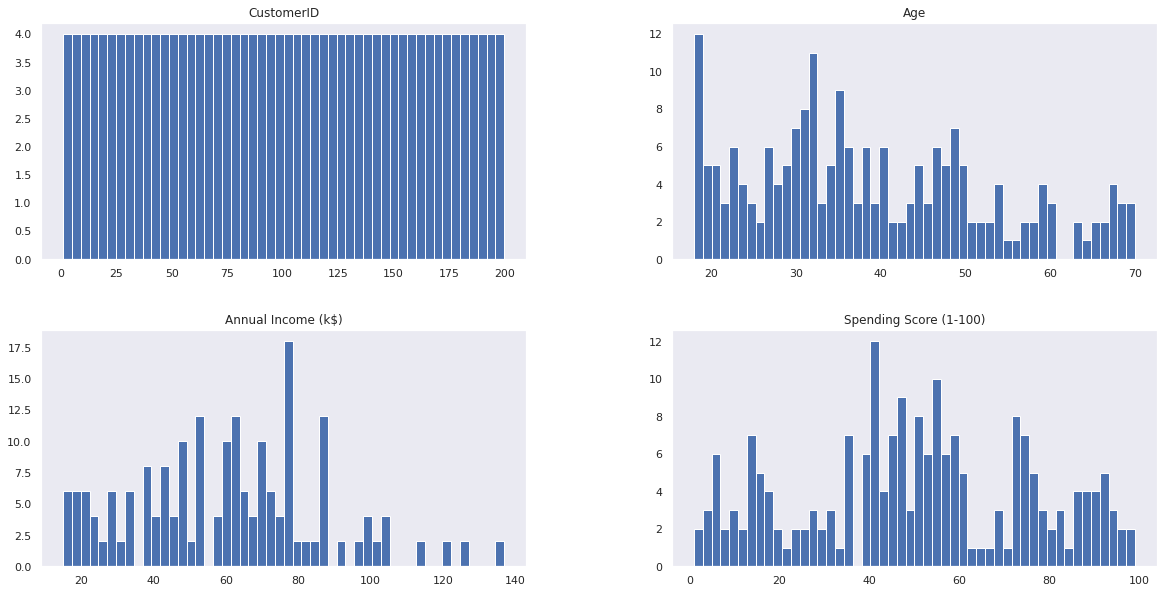

In [211]:

mydata.hist(figsize=(20,10), grid = False, bins = 50)

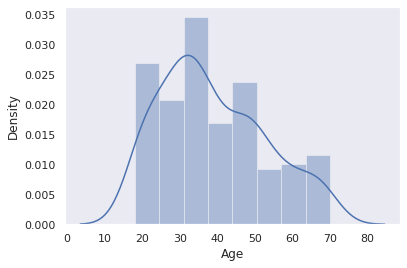

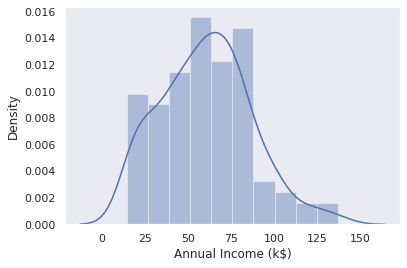

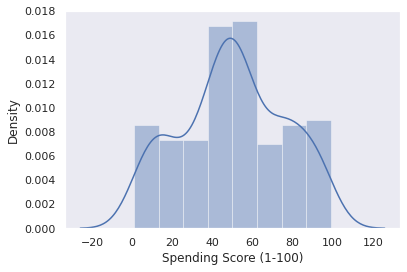

In [212]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(mydata[i])

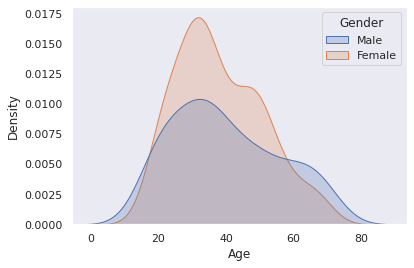

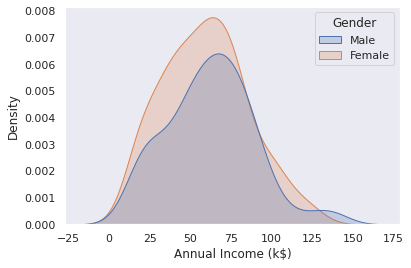

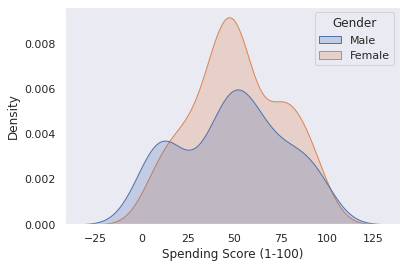

In [213]:

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(mydata[i], shade=True, hue=mydata['Gender'])

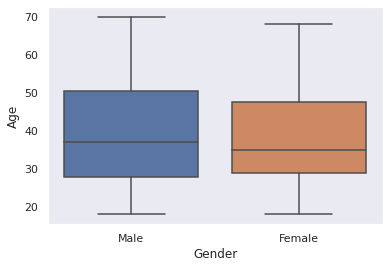

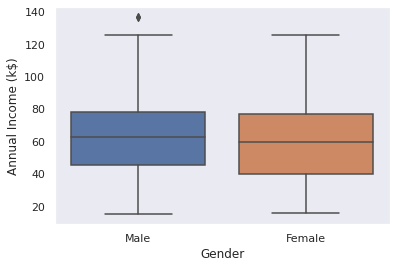

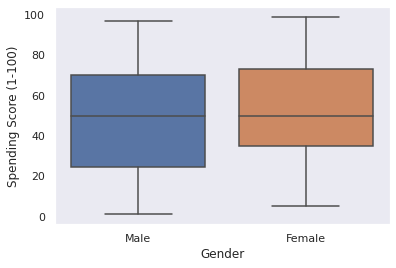

In [214]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=mydata,x='Gender',y=mydata[i])

In [215]:
mydata['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

**3.2 Bi- Variate** **Analysis**

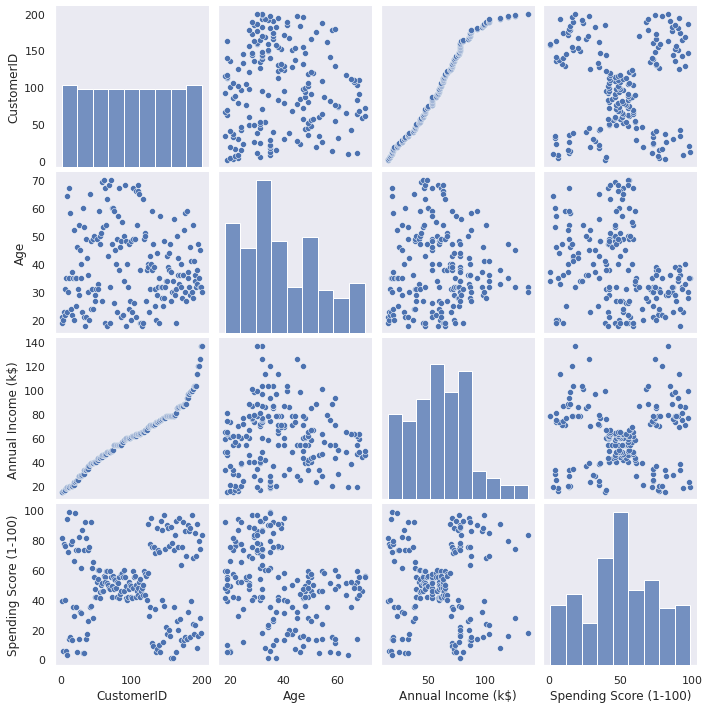

In [216]:
numerical_features = mydata.select_dtypes(include=[np.number]).columns
categorical_features = mydata.select_dtypes(include=[np.object]).columns
numerical_features
categorical_features
sns.pairplot(mydata[numerical_features])

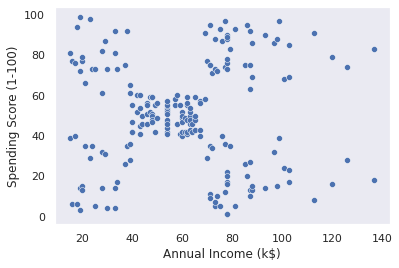

In [217]:
sns.scatterplot(data=mydata, x='Annual Income (k$)', y='Spending Score (1-100)')

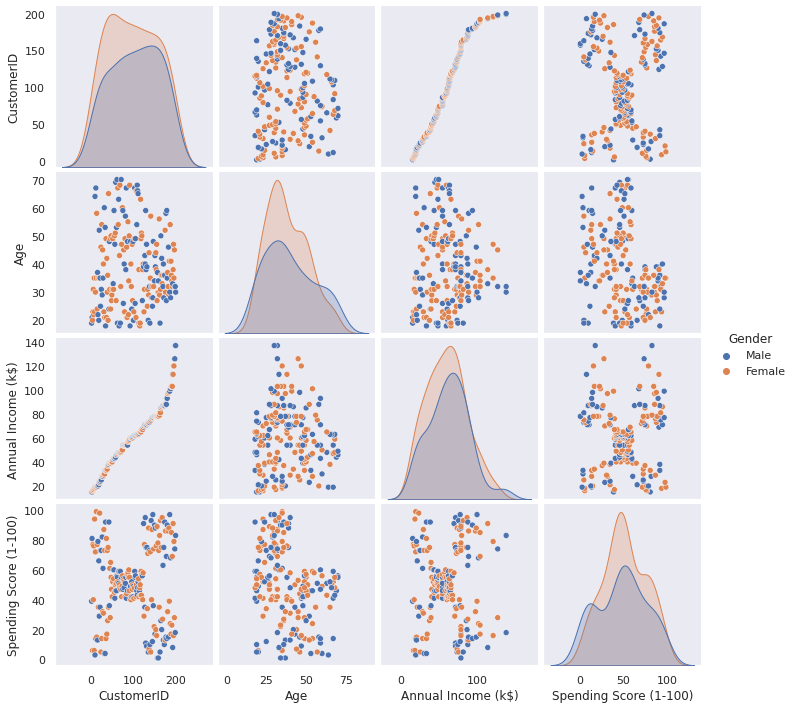

In [218]:
sns.pairplot(mydata,hue='Gender')

In [219]:
mydata.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [220]:
mydata.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [221]:
mydata.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


**3.3 Multivariate Analysis**

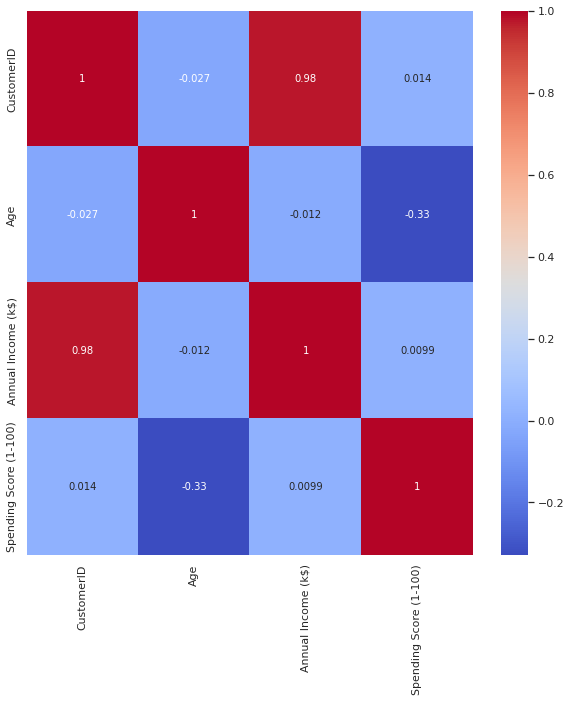

In [222]:
plt.figure(figsize=(10, 10))
sns.heatmap(mydata.corr(),annot=True,cmap='coolwarm')

**4.Perform descriptive statistics on the dataset**

In [223]:
mydata.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [224]:

mydata.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [225]:
mydata.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [227]:
mydata.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [228]:
mydata.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [229]:
mydata.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [230]:
mydata.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [231]:
mydata.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [232]:
mydata.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

**5. Check for Missing values and deal with them.**

In [233]:
mydata.duplicated().sum()

0

In [234]:
mydata.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [235]:
mydata.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [236]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [237]:
mydata.sum()

CustomerID                                                            20100
Gender                    MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMa...
Age                                                                    7770
Annual Income (k$)                                                    12112
Spending Score (1-100)                                                10040
dtype: object

In [238]:
mydata.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

**6. Find the outliers and replace them outliers**

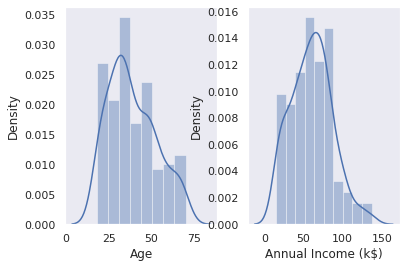

In [239]:
sns.set(style = 'dark')
plt.subplot(1,2,1)
sns.distplot(mydata['Age'])
plt.subplot(1,2,2)
sns.distplot(mydata['Annual Income (k$)'])


In [240]:
print("Highest allowed",mydata['Age'].mean() + 3*mydata['Age'].std())
print("Lowest allowed",mydata['Age'].mean() - 3*mydata['Age'].std())

Highest allowed 80.75702199467665
Lowest allowed -3.0570219946766386


In [241]:
new_mydata = mydata[(mydata['Age'] < 50) & (mydata['Age'] > 25)]
new_mydata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
4,5,Female,31,17,40
6,7,Female,35,18,6
9,10,Female,30,19,72
11,12,Female,35,19,99
14,15,Male,37,20,13
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [242]:
upper_limit = mydata['Age'].mean() + 5*mydata['Age'].std()
lower_limit = mydata['Age'].mean() - 5*mydata['Age'].std()

In [243]:
mydata['Age'] = np.where(
    mydata['Age']>upper_limit,
    upper_limit,
    np.where(
        mydata['Age']<lower_limit,
        lower_limit,
        mydata['Age']
    )
)

In [244]:
mydata['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

**7. Check for Categorical columns and perform encoding.**

In [245]:
mydata.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [246]:
mydata_numeric = mydata[['CustomerID','Age', 'Annual Income (k$)','Spending Score (1-100)' ]]
mydata_categorical = mydata[['Gender']]

In [247]:
mydata_numeric.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15,39
1,2,21.0,15,81
2,3,20.0,16,6
3,4,23.0,16,77
4,5,31.0,17,40


In [248]:
mydata_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [249]:
print(mydata['CustomerID'].unique())
print(mydata['Gender'].unique())
print(mydata['Age'].unique())
print(mydata['Annual Income (k$)'].unique())
print(mydata['Spending Score (1-100)'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
['Male' 'Female']
[19. 21. 20. 23. 31. 22. 35. 64. 30. 67. 58. 24. 37. 52. 25. 46. 54. 29.
 45. 40. 60. 53. 18. 49. 42. 36. 65. 48. 50. 27. 33. 59. 47. 51. 69. 70.
 63. 43. 68. 32. 26. 57

**encoding** 

In [250]:
gender_encoder = LabelEncoder()

In [251]:
gender_encoder.fit(mydata_categorical['Gender'])

LabelEncoder()

In [252]:
gender_values = gender_encoder.transform(mydata_categorical['Gender'])

In [253]:
print("Before Encoding:", list(mydata_categorical['Gender'][-10:]))
print("After Encoding:", gender_values[-10:])
print("The inverse from the encoding result:", gender_encoder.inverse_transform(gender_values[-10:]))

Before Encoding: ['Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
After Encoding: [0 0 1 0 0 0 0 1 1 1]
The inverse from the encoding result: ['Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Male' 'Male']


**8. Scaling the data**

In [254]:
numCol  = [col for col in mydata.columns if  mydata[col].dtype != "O"] 
numCol

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [255]:
catColumn  = [col for col in mydata.columns if  mydata[col].dtype == "O"]
catColumn

['Gender']

In [257]:
from sklearn.preprocessing import scale
X=mydata.drop(columns=['Age'],axis=1)
X.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40


In [258]:
scaler=MinMaxScaler()

In [259]:
mydata[["Age"]]=scaler.fit_transform(mydata[["Age"]])
print(mydata)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  0.019231                  15                      39
1             2    Male  0.057692                  15                      81
2             3  Female  0.038462                  16                       6
3             4  Female  0.096154                  16                      77
4             5  Female  0.250000                  17                      40
..          ...     ...       ...                 ...                     ...
195         196  Female  0.326923                 120                      79
196         197  Female  0.519231                 126                      28
197         198    Male  0.269231                 126                      74
198         199    Male  0.269231                 137                      18
199         200    Male  0.230769                 137                      83

[200 rows x 5 columns]


**9. Perform any of the clustering algorithms**

In [260]:
clustering1 = KMeans(n_clusters=6)

In [261]:
clustering1.fit(mydata[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [262]:
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [263]:
mydata['Income Cluster']=clustering1.labels_
mydata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,0.019231,15,39,4
1,2,Male,0.057692,15,81,4
2,3,Female,0.038462,16,6,4
3,4,Female,0.096154,16,77,4
4,5,Female,0.250000,17,40,4


In [264]:
mydata['Income Cluster'].value_counts()

0    46
5    44
1    42
4    32
3    28
2     8
Name: Income Cluster, dtype: int64

In [265]:
clustering1.inertia_

5081.484660267268

**10. Add the cluster data with the primary dataset**

In [266]:
inertia_scores=[mydata]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(mydata[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [267]:
inertia_scores

[     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
 0             1    Male  0.019231                  15                      39   
 1             2    Male  0.057692                  15                      81   
 2             3  Female  0.038462                  16                       6   
 3             4  Female  0.096154                  16                      77   
 4             5  Female  0.250000                  17                      40   
 ..          ...     ...       ...                 ...                     ...   
 195         196  Female  0.326923                 120                      79   
 196         197  Female  0.519231                 126                      28   
 197         198    Male  0.269231                 126                      74   
 198         199    Male  0.269231                 137                      18   
 199         200    Male  0.230769                 137                      83   
 
      Income C

In [268]:

mydata_one = mydata[['Age','Spending Score (1-100)']]
data=[]
for n in range(1,10):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=400, 
                    tol=0.0001,  random_state= 45 ) )
    kmeans.fit(mydata_one)
    data.append(kmeans.inertia_)

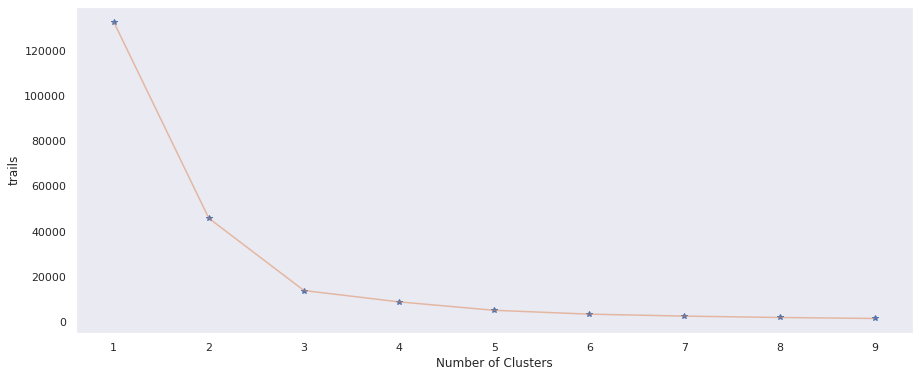

In [269]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , data , '*')
plt.plot(np.arange(1 , 10) , data , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('trails')
plt.show()

In [270]:
kmeans = KMeans(n_clusters = 4, random_state = 45)
k_fit = kmeans.fit(mydata_one)
clusters = k_fit.labels_

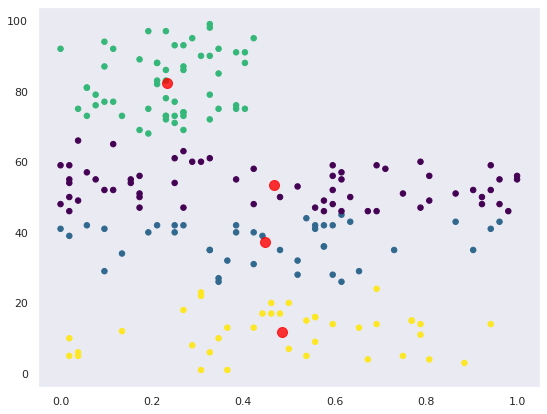

In [271]:
plt.figure(figsize = [9, 7], clear = False)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_
plt.scatter(mydata_one['Age'],mydata_one['Spending Score (1-100)'],c = clusters,s = 30,cmap = "viridis")
plt.scatter(centers[:, 0],centers[:, 1],c = "red",s = 100,alpha = 0.8);


In [272]:
data = pd.DataFrame({"CustomerID": mydata['CustomerID'], "Group": (k_fit.labels_ + 1)})
data.head(10)

,CustomerID,Group
0,1,2
1,2,3
2,3,4
3,4,3
4,5,2
5,6,3
6,7,4
7,8,3
8,9,4
9,10,3


**11. Split the data into dependent and independent
variables.**

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [274]:
X_train

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
134,135,Male,73,5
66,67,Female,48,50
26,27,Female,28,32
113,114,Male,64,46
168,169,Female,87,27
...,...,...,...,...
67,68,Female,48,48
192,193,Male,113,8
117,118,Female,65,59
47,48,Female,40,47


In [275]:
 X_test

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
18,19,Male,23,29
170,171,Male,87,13
107,108,Male,63,46
98,99,Male,61,42
177,178,Male,88,69
182,183,Male,98,15
5,6,Female,17,76
146,147,Male,77,36
12,13,Female,20,15
152,153,Female,78,20


In [276]:
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", Y_train.shape)
print("Shape of y_test :", Y_test.shape)

Shape of x_train : (160, 4)
Shape of x_test : (40, 4)
Shape of y_train : (160, 1)
Shape of y_test : (40, 1)


In [277]:
X_train.head()
X_test.head()
Y_train.head()
Y_test.head()

,Gender
18,1
170,1
107,1
98,1
177,1


**12.Split the data into training and testing**

In [278]:
X=mydata['Gender']
mydata =mydata.drop(['Gender'], axis = 1)
X.head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [279]:
Y=mydata.iloc[:,:-1]
Y.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,15,39
1,2,0.057692,15,81
2,3,0.038462,16,6
3,4,0.096154,16,77
4,5,0.250000,17,40


In [280]:
Y=mydata.iloc[:,-1]
Y.head()

0    4
1    4
2    4
3    4
4    4
Name: Income Cluster, dtype: int32

**13. Build the Model**

In [331]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [324]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [313]:
y_predict = model.predict(X_test)

In [315]:
y_predict_train = model.predict(X_train)

**14. Train the Model**

In [330]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

Training accuracy:  1.0


**15. Test the Model**

In [329]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  0.925


**16. Measure the performance using Evaluation Metrics.**

In [202]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
X_train=[5,-1,2,10]
Y_test=[3.5,-0.9,2,9.9]
print('RSquared=',r2_score(X_train,Y_test))
print('MAE=',mean_absolute_error(X_train,Y_test))
print('MSE=',mean_squared_error(X_train,Y_test))

RSquared= 0.9656060606060606
MAE= 0.42499999999999993
MSE= 0.5674999999999999
